In [2]:
#Created by Anjana Tiha
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import (scatter_matrix,bootstrap_plot)
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


imdb_movie = pd.read_csv("movie_metadata.csv")
imdb_movie['actor_1_name'] = imdb_movie['actor_1_name'].fillna('None').astype('category')
imdb_movie['actor_1_facebook_likes'] = imdb_movie['actor_1_facebook_likes'].fillna(0.0).astype(np.float)
imdb_movie['actor_2_name'] = imdb_movie['actor_2_name'].fillna('None').astype('category')
imdb_movie['actor_2_facebook_likes'] = imdb_movie['actor_2_facebook_likes'].fillna(0.0).astype(np.float)
imdb_movie['actor_3_name']=imdb_movie['actor_3_name'].fillna('None').astype('category')
imdb_movie['actor_3_facebook_likes'] = imdb_movie['actor_3_facebook_likes'].fillna(0.0).astype(np.float)
imdb_movie['director_name']=imdb_movie['director_name'].fillna('None').astype('category')
imdb_movie['director_facebook_likes'] = imdb_movie['director_facebook_likes'].fillna(0.0).astype(np.float)
imdb_movie['cast_total_facebook_likes'] = imdb_movie['cast_total_facebook_likes'].fillna(0.0).astype(np.float)
imdb_movie['budget'] = imdb_movie['budget'].fillna(0.0).astype(np.float)
imdb_movie['gross'] = imdb_movie['gross'].fillna(0.0).astype(np.float)



C:\Users\Anjana\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


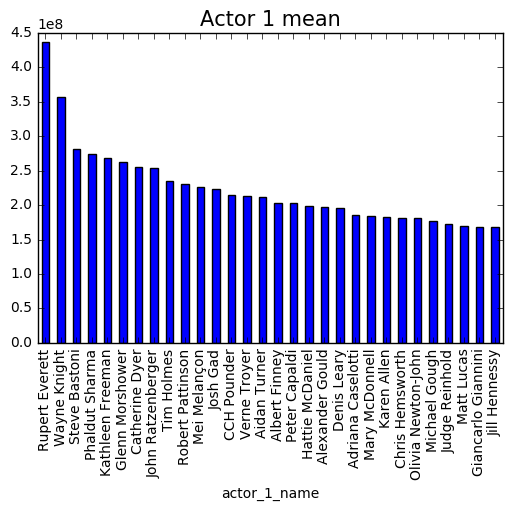

In [10]:
actor_1_gross_mean = imdb_movie.groupby("actor_1_name").mean()
actor_1_gross = actor_1_gross_mean['gross']
actor_1_gross_mean_sort = actor_1_gross.sort('gross', inplace=False, ascending =False)

#print(actor_gross_mean_sort)
plt.title("Actor 1 mean", fontsize = 15)
actor_1_gross_mean_sort[:30].plot(kind='bar')
plt.show()



C:\Users\Anjana\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


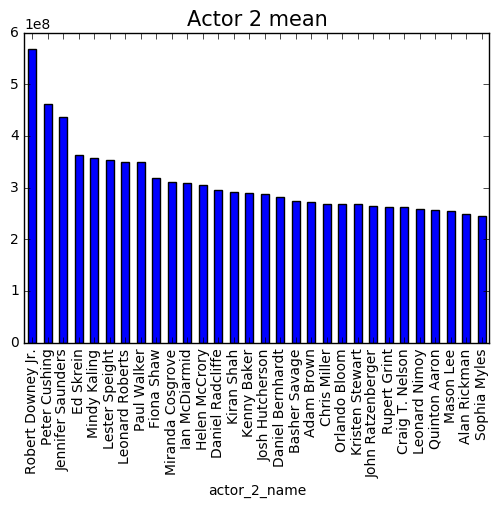

In [4]:
actor_2_gross_mean = imdb_movie.groupby("actor_2_name").mean()
actor_2_gross = actor_2_gross_mean['gross']
actor_2_gross_mean_sort = actor_2_gross.sort('gross', inplace=False, ascending =False)

#print(actor_gross_mean_sort)
plt.title("Actor 2 mean", fontsize = 15)
actor_2_gross_mean_sort[:30].plot(kind='bar')
plt.show()



C:\Users\Anjana\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


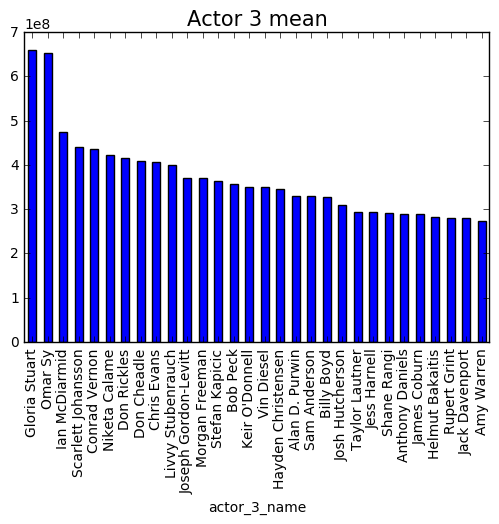

In [5]:
actor_3_gross_mean = imdb_movie.groupby("actor_3_name").mean()
actor_3_gross = actor_3_gross_mean['gross']
actor_3_gross_mean_sort = actor_3_gross.sort('gross', inplace=False, ascending =False)

#print(actor_gross_mean_sort)
plt.title("Actor 3 mean", fontsize = 15)
actor_3_gross_mean_sort[:30].plot(kind='bar')
plt.show()




C:\Users\Anjana\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


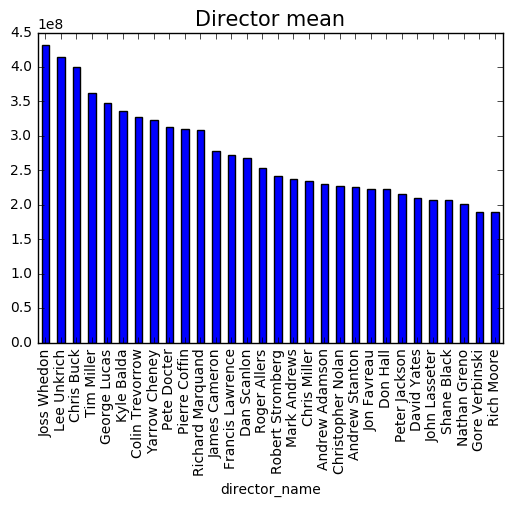

In [7]:
director_gross_mean = imdb_movie.groupby("director_name").mean()
director_gross = director_gross_mean['gross']
director_gross_sort = director_gross.sort('gross', inplace=False, ascending =False)

#print(actor_gross_mean_sort)
plt.title("Director mean", fontsize = 15)
director_gross_sort[:30].plot(kind='bar')
plt.show()



C:\Users\Anjana\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


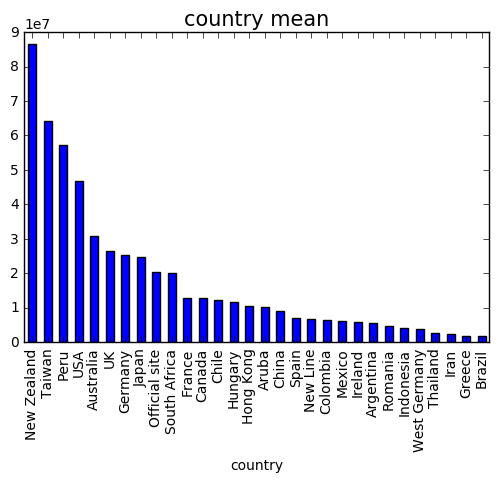

In [21]:
country_gross_mean = imdb_movie.groupby("country").mean()
country_gross = country_gross_mean['gross']
country_gross_sort = country_gross.sort('gross', inplace=False, ascending =False)

#print(actor_gross_mean_sort)
plt.title("country mean", fontsize = 15)
country_gross_sort[:30].plot(kind='bar')
plt.show()

C:\Users\Anjana\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


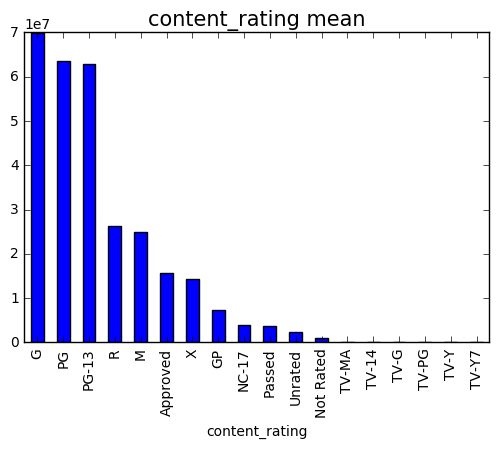

In [4]:
content_rating_gross_mean = imdb_movie.groupby("content_rating").mean()
content_rating_gross = content_rating_gross_mean['gross']
content_rating_gross_sort = content_rating_gross.sort('gross', inplace=False, ascending =False)

#print(actor_gross_mean_sort)
plt.title("content_rating mean", fontsize = 15)
content_rating_gross_sort[:30].plot(kind='bar')
plt.show()

C:\Users\Anjana\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


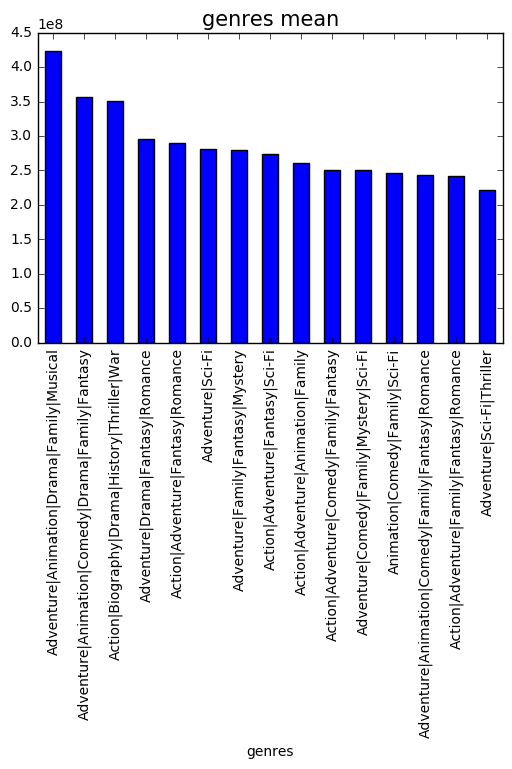

In [5]:
genres_gross_mean = imdb_movie.groupby("genres").mean()
genres_gross = genres_gross_mean['gross']
genres_gross_sort = genres_gross.sort('gross', inplace=False, ascending =False)

#print(actor_gross_mean_sort)
plt.title("genres mean", fontsize = 15)
genres_gross_sort[:15].plot(kind='bar')
plt.show()

Populating the interactive namespace from numpy and matplotlib


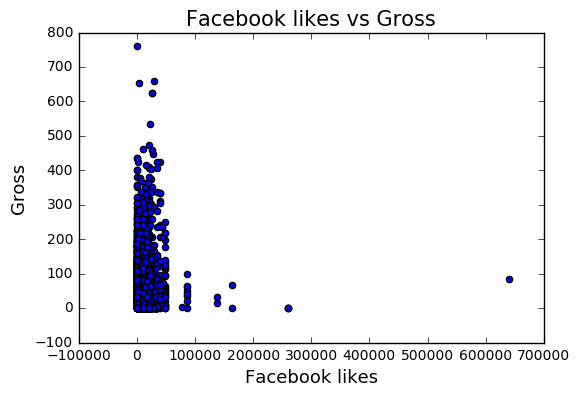

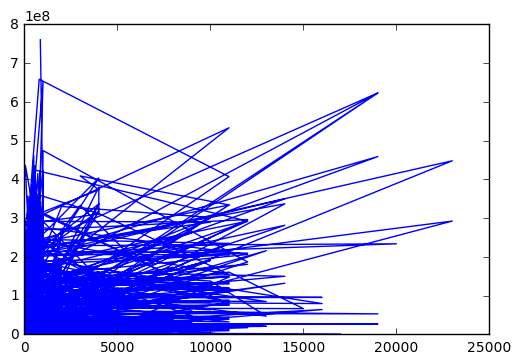

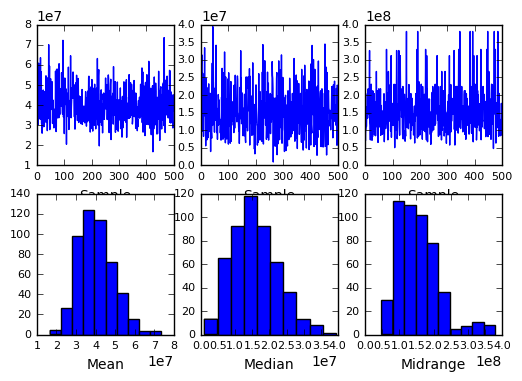

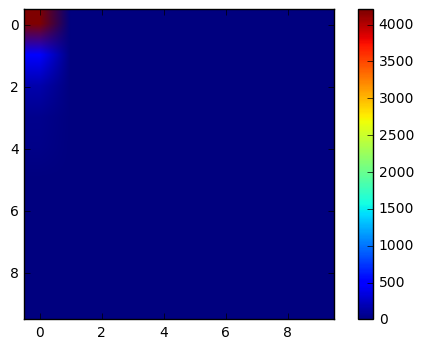

In [46]:
%pylab inline

plt.title("Facebook likes vs Gross", fontsize = 15)
plt.xlabel("Facebook likes",  fontsize = 13)
plt.ylabel("Gross",  fontsize = 13)
plt.scatter(imdb_movie['actor_1_facebook_likes'], imdb_movie['gross']/1000000)
plt.show()

plt.plot(imdb_movie['actor_3_facebook_likes'], imdb_movie['gross'])
plt.show()
#bootstrap
bootstrap_plot(imdb_movie['gross'], samples=500)

plt.show()
#heat map
H, xedges, yedges = np.histogram2d(imdb_movie['gross'], imdb_movie['actor_1_facebook_likes'])
c = plt.imshow(H)
plt.colorbar(c)



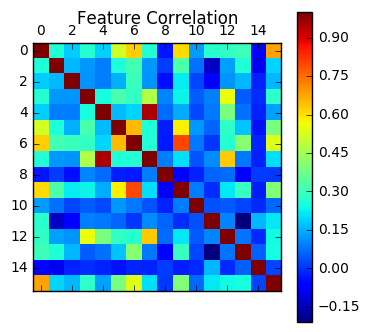

In [20]:

corr = imdb_movie.corr(method = 'pearson')
c = plt.matshow(corr)
plt.title("Feature Correlation")
plt.colorbar(c)
plt.show()
